In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('CardioGoodFitness.csv')

In [7]:
data.shape

(180, 9)

In [3]:
data.head()  #Display top 5 records

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [12]:
data.groupby(['MaritalStatus'])['Age'].count()

MaritalStatus
Partnered    107
Single        73
Name: Age, dtype: int64

In [6]:
data.describe(include='all') # analytical summary of the dataset

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014D46588F48>,
      dtype=object)

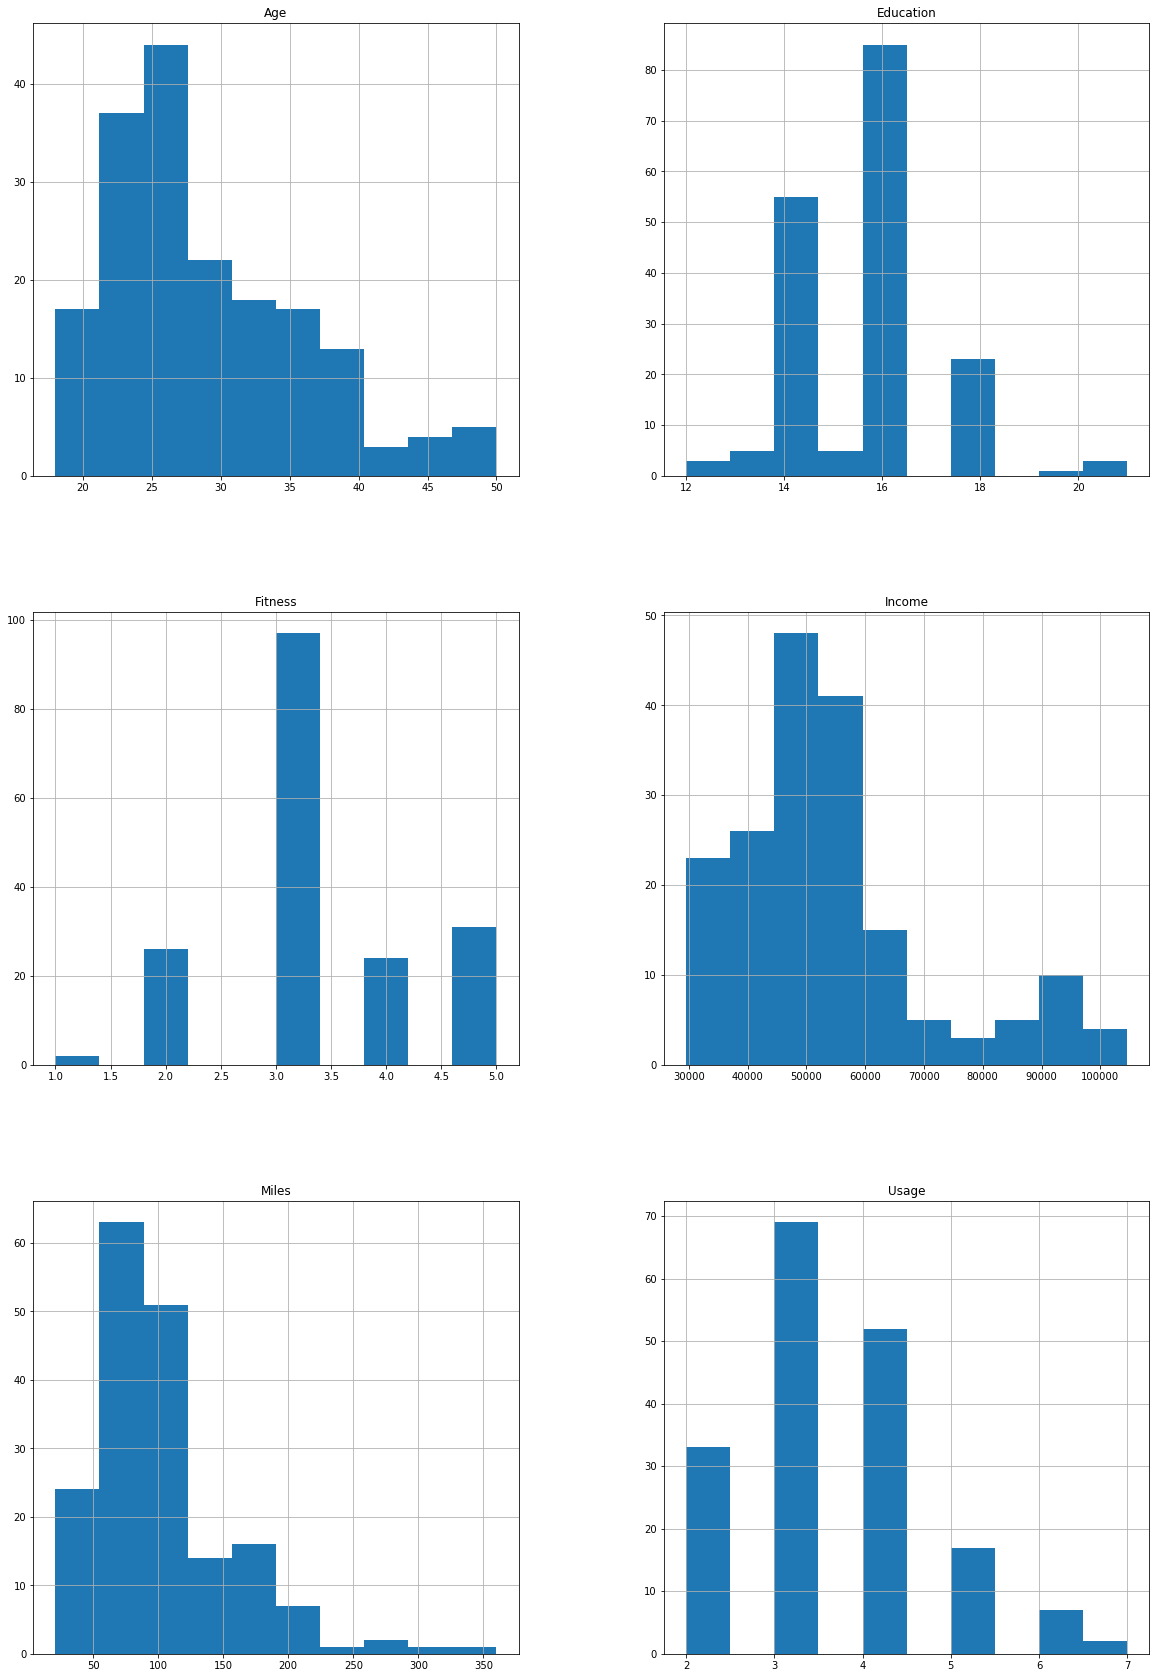

In [14]:
data.hist(figsize=(20,30)) #summary of distribution for relevant variables

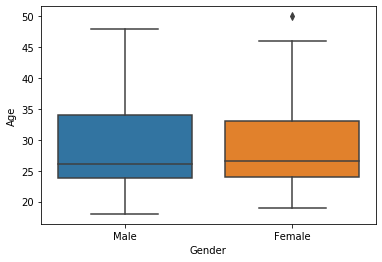

In [15]:
# Relationship between categorical and continuous variable
sns.boxplot(x="Gender", y="Age", data = data)  # Age distribution of gym goers with respect to gender

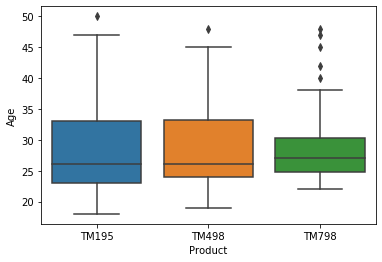

In [16]:
# Relationship between categorical and continuous variable
sns.boxplot(x="Product", y="Age", data = data)  # Product distribution of gym goers with respect to gender

In [17]:
#Relationship between two categorical variables
pd.crosstab(data['Product'], data['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


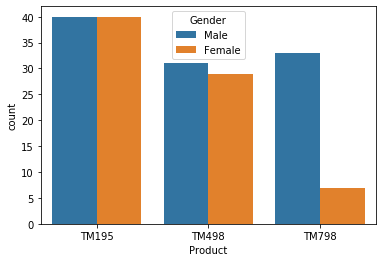

In [18]:
#Relationship between two categorical variables
sns.countplot(x="Product", hue = "Gender", data = data)

In [19]:
pd.pivot_table(data, index=['Product', 'Gender'], columns = ['MaritalStatus'], aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [20]:
#Average of miles for combination of given variables.
pd.pivot_table(data, 'Miles',index=['Product', 'Gender'], columns = ['MaritalStatus']) 

MaritalStatus    Partnered      Single
Product Gender                        
TM195   Female   74.925926   78.846154
        Male     80.190476   99.526316
TM498   Female   94.000000   80.214286
        Male     87.238095   91.100000
TM798   Female  215.000000  133.333333
        Male    176.315789  147.571429

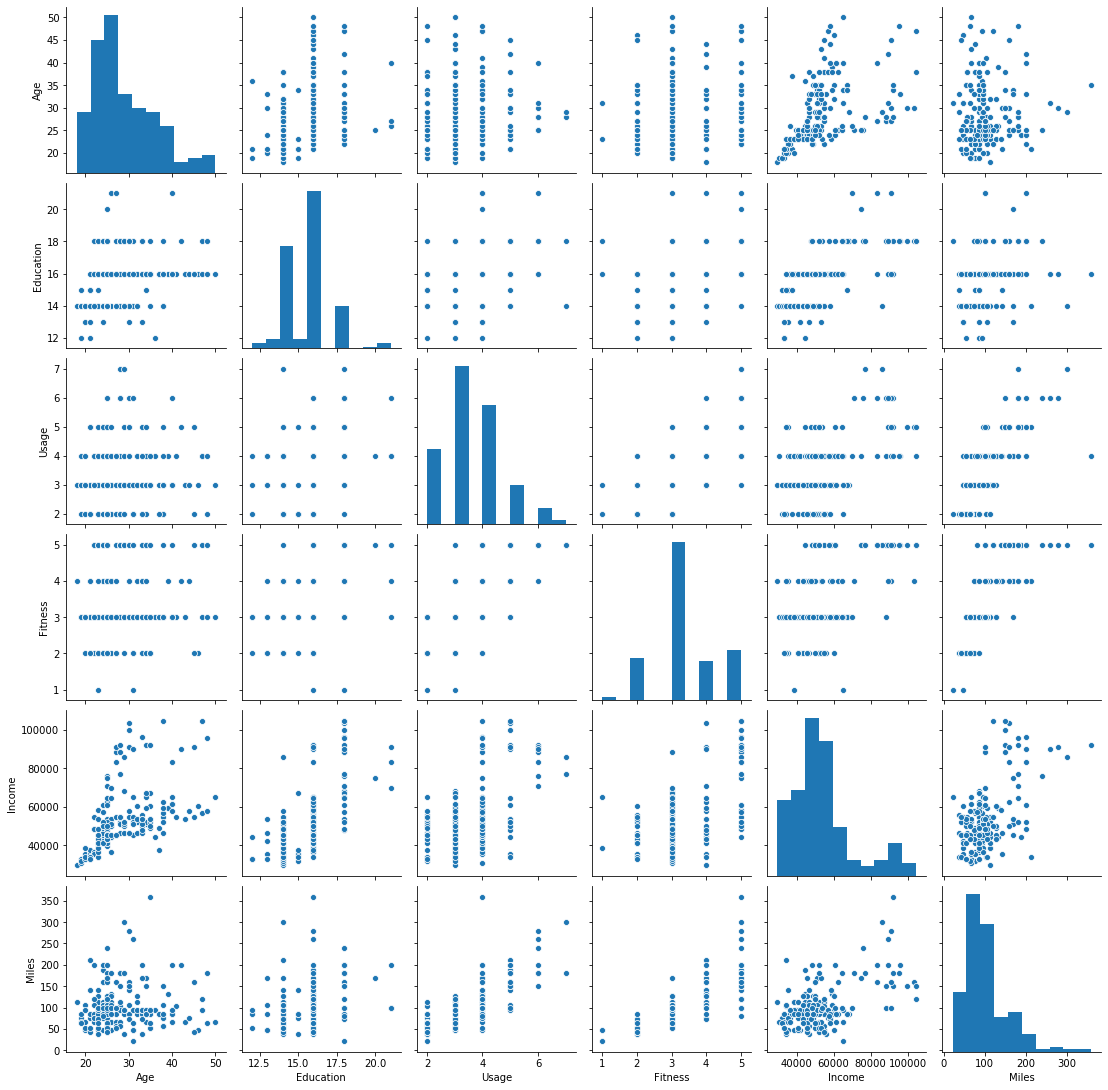

In [21]:
sns.pairplot(data)

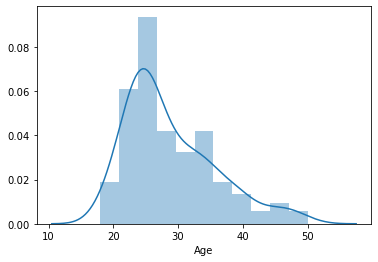

In [22]:
sns.distplot(data['Age'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014D48CEE9C8>,
      dtype=object)

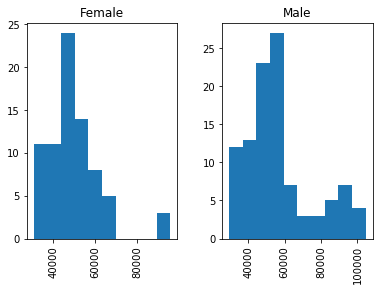

In [23]:
data.hist(by='Gender', column = 'Income')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014D4A231888>,
      dtype=object)

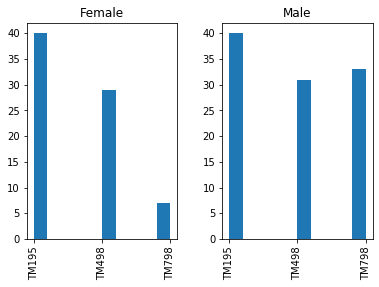

In [24]:
data.hist(by='Gender', column = 'Product')

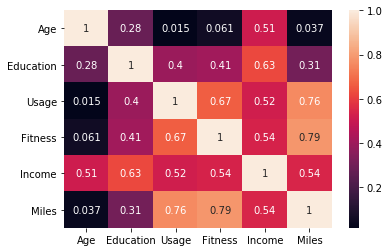

In [25]:
corr= data.corr()
sns.heatmap(corr, annot=True)